<a href="https://colab.research.google.com/github/ccyang8792/ccyang8792.github.io/blob/main/ts_%5BYang%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Part 1



##1

In [3]:
ts1 = pd.read_csv('final_timeseries_1.csv', parse_dates= ['date'])
ts1=ts1.set_index('date').sort_index()
ts1

,demand
date,
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0


In [4]:
ts2 = pd.read_csv('final_timeseries_2.csv', parse_dates= ['date'])
ts2=ts2.set_index('date').sort_index()
ts2

,demand
date,
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0


##2

In [5]:
ts1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 690 entries, 2022-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  660 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [6]:
ts1.index[0]

Timestamp('2022-01-01 00:00:00')

In [7]:
ts1.index[-1]

Timestamp('2023-12-31 00:00:00')

In [8]:
full_range=pd.date_range(ts1.index[0],ts1.index[-1])
full_range

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [9]:
missing_dates=full_range.difference(ts1.index).value_counts().sum()
missing_dates
# There are a total of 40 missing dates

np.int64(40)

##3

In [10]:
missing_values=ts1['demand'].isna()
missing_values.sum()
#There are 30 Na values

np.int64(30)

##4

In [43]:
ts1=ts1.reindex(full_range)
ts2=ts2.reindex(full_range)

In [12]:
ts1.isna().sum()

,0
demand,70


In [13]:
ts2.isna().sum()

,0
demand,70


Step 4 is a pretty much combining step 2 and 3 together to get the true number of NAs.  This is because we had 40 missing dates and 30 values that were NAs from the original dataset.  When we reindex, those 40 missing dates are added back into the dataset, but since they have no values, they also appear as NAs.  As a result, the total number of NaNs after reindexing is 70.

##5

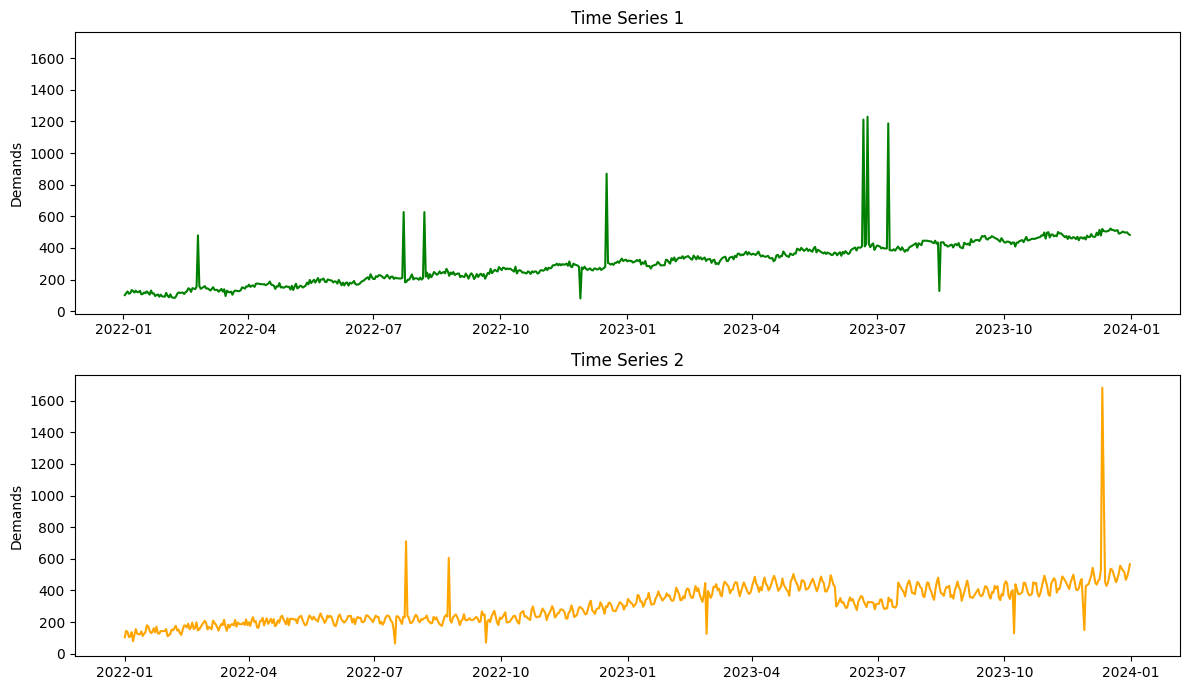

In [40]:
fig, axes = plt.subplots(2,1, figsize=(12,7),sharey=True)
sns.lineplot(data=ts1, x=ts1.index, y=ts1['demand'], ax=axes[0], color='green')
axes[0].set_title('Time Series 1')
axes[0].set_xlabel('')
axes[0].set_ylabel('Demands')
sns.lineplot(data=ts2, x=ts2.index, y=ts2['demand'], ax=axes[1], color='orange')
axes[1].set_title('Time Series 2')
axes[1].set_xlabel('')
axes[1].set_ylabel('Demands')
plt.tight_layout()
plt.show()

#Filling in the NAs

In [55]:
ts1 = ts1.interpolate().bfill().ffill()
ts2 = ts2.interpolate().bfill().ffill()

In [53]:
# Outlier Detection - IQR Method for ts1
Q1_ts1 = ts1['demand'].quantile(0.25)
Q3_ts1 = ts1['demand'].quantile(0.75)
IQR_ts1 = Q3_ts1 - Q1_ts1
lower_bound_ts1 = Q1_ts1 - 1.5 * IQR_ts1
upper_bound_ts1 = Q3_ts1 + 1.5 * IQR_ts1

outliers_ts1 = ts1[(ts1['demand'] < lower_bound_ts1) | (ts1['demand'] > upper_bound_ts1)]
print(f"TS1 Outliers (IQR Method): {len(outliers_ts1)} outliers found")
print(outliers_ts1)

TS1 Outliers (IQR Method): 4 outliers found
            demand
2022-12-17   870.0
2023-06-21  1212.0
2023-06-24  1230.0
2023-07-09  1188.0


In [54]:
# Outlier Detection - IQR Method for ts2
Q1_ts2 = ts2['demand'].quantile(0.25)
Q3_ts2 = ts2['demand'].quantile(0.75)
IQR_ts2 = Q3_ts2 - Q1_ts2
lower_bound_ts2 = Q1_ts2 - 1.5 * IQR_ts2
upper_bound_ts2 = Q3_ts2 + 1.5 * IQR_ts2

outliers_ts2 = ts2[(ts2['demand'] < lower_bound_ts2) | (ts2['demand'] > upper_bound_ts2)]
print(f"TS2 Outliers (IQR Method): {len(outliers_ts2)} outliers found")
print(outliers_ts2)

TS2 Outliers (IQR Method): 3 outliers found
            demand
2022-07-24   711.0
2023-12-11  1683.0
2023-12-12  1069.0
